# SESI 14
Nama : Syaima Radestya <br>
Kode Peserta : PYTN-KS10-011 <br>
Program : Introduction to Python for Data Science <br>

# UNSUPERVISED LEARNING
***
Unsupervised machine learning algorithm digunakan untuk mengelompokkan data tidak terstruktur menurut kesamaan dan pola yg berbeda dalam kumpulan data. Unsupervised algorithm menangani data tanpa pelatihan sebelumnya - ini adalah fungsi yang melakukan tugasnya dengan data yang tersedia. Di satu sisi, Unsupervised dibiarkan di perangkatnya sendiri untuk menyelesaikan masalah sesuai keinginannya. <br> <br>
Unsupervised algorithm berfungsi dengan data tak berlabel. Tujuannya adalah eksplorasi. Jika supervised machine learning berfungsi di bawah aturan yang ditetapkan dengan jelas, unsupervised learning berfungsi dalam kondisi hasil yang tidak diketahui dan karenanya perlu didefinisikan dalam proses. Unsupervised machine learning algorithm digunakan untuk:
1. explore the structure of the information;
2. extract valuable insights;
3. detect patterns;
4. implement this into its operation in order to increase efficiency.

Dengan kata lain, Unsupervised learning mendeskripsikan informasi yang ada - menelusuri seluk-beluknya dan mengidentifikasi data apa itu sebenarnya. Dua kasus penggunaan umum untuk unsupervised learning adalah exploratory analysis dan dimensionality reduction. <br> <br>
Unsupervised learning sangat berguna dalam analisis eksplorasi karena dapat secara otomatis mengidentifikasi struktur dalam data. Misalnya, jika seorang analis mencoba untuk mensegmentasikan konsumen, metode unsupervised clustering akan menjadi titik awal yang bagus untuk analisis mereka. Dalam situasi di mana tidak mungkin atau tidak praktis bagi manusia untuk mengusulkan tren dalam data, unsupervised learning dapat memberikan wawasan awal yang kemudian dapat digunakan untuk menguji hipotesis individu. "Clustering" adalah istilah yang digunakan untuk menggambarkan eksplorasi data. Operasi clustering ada dua. Hasil tangkapannya adalah bahwa kedua bagian dari proses tersebut dilakukan pada waktu yang bersamaan. Pengelompokan meliputi:
- Menentukan kredensial yang membentuk persyaratan untuk setiap cluster. Kredensial kemudian dicocokkan dengan data yang diproses dan dengan demikian cluster terbentuk.
- Mengelompokkan kumpulan data ke dalam grup tertentu (dikenal sebagai kluster) 
berdasarkan fitur umumnya. 

Teknik Clustering sederhana namun efektif. Mereka membutuhkan kerja keras namun seringkali dapat memberi kita beberapa wawasan berharga tentang data. Dengan demikian, Clustering telah digunakan di banyak aplikasi selama beberapa dekade termasuk:
- Biology — untuk pengelompokan genetik dan spesies;
- Medical imaging — untuk membedakan berbagai jenis jaringan;
- Market research — untuk memahami berbagai kelompok pelanggan berdasarkan beberapa atribut
- Recommender systems — such as giving you better Amazon suggestions or Netflix movie matches.

Dimensionality reduction, yang mengacu pada metode yang digunakan untuk merepresentasikan data menggunakan lebih sedikit kolom atau fitur, dapat dilakukan melalui unsupervised methods. Singkatnya, Dimensionality reduction adalah proses penyaringan informasi yang relevan. Dimensionality reduction juga dapat diulangi sebagai menyingkirkan hal-hal yang tidak perlu. <br> <br>
Masalahnya, data mentah biasanya dilapisi dengan lapisan noise data yang tebal. Bisa apa saja - nilai yang hilang, data yang salah, bit yang kacau, sesuatu yang sederhana yang tidak relevan dengan penyebabnya. Karena itu, sebelum kita mulai menggali insight, kita perlu membersihkannya terlebih dahulu. Dari sudut pandang teknis, Dimensionality reduction adalah proses mengurangi kompleksitas data sambil mempertahankan bagian yang relevan dari strukturnya hingga tingkat tertentu.

## Reduksi Dimensi : PCA

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X, y = iris.data, iris.target
pca = PCA(n_components=2)

pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (150, 2)


Arti dari 2 componen:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


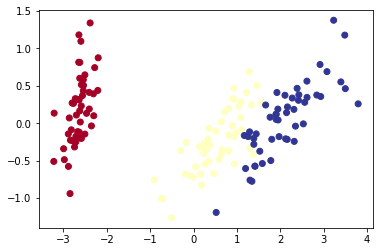

In [3]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Arti dari 2 componen:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

## Klaster : K-Means
K-Means merupakan teknik klaster paling sederhana (berdasarkan jarak)

akan diaplikasikan pada iris dataset

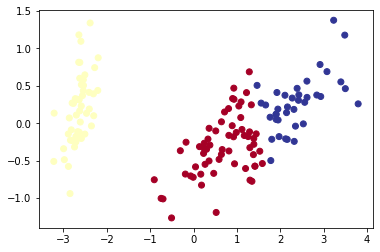

In [4]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
# open data
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# scaling data
scaler = StandardScaler()
scaler.fit(df)

data_scaled = scaler.transform(df)

In [15]:
# cluster initial
kmeans = KMeans(n_clusters=4)

kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [16]:
kmeans.inertia_

1851.8408722743848

In [17]:
inertias = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    
    iner = kmeans.inertia_
    inertias.append(iner)

c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method')

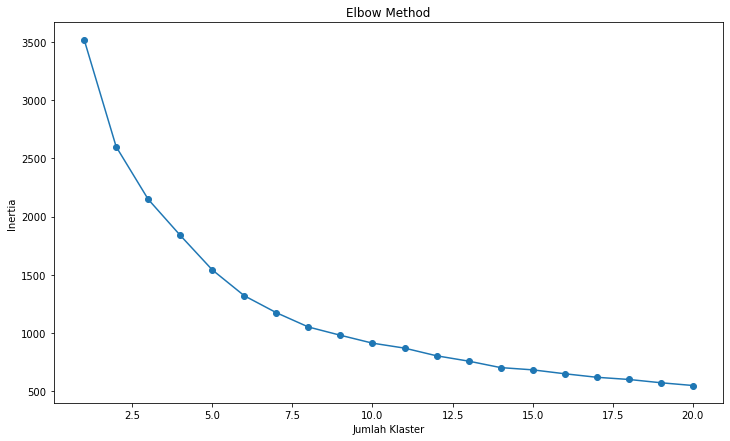

In [23]:
plt.figure(figsize=(12,7))
plt.plot(range(1,21), inertias, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Elbow Method')

In [24]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data_scaled)

KMeans()

In [25]:
cluster = kmeans.predict(data_scaled)
df['cluster'] = cluster
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,7
1,2,3,7057,9810,9568,1762,3293,1776,7
2,2,3,6353,8808,7684,2405,3516,7844,7
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,7
